# Explore and Analyze data using Databricks

In this notebook, you'll use Spark in Azure Databricks to explore trip data files. One of the core ways in which you work with data in Spark is to load data into a **DataFrame** object, and then query, filter, and manipulate the dataframe to explore the data it contains.

## Ingest data

Use the **&#9656; Run Cell** menu option at the top-left of the following cell to run it and download data files into the Databricks file system (DBFS).

In [ ]:
%sh
# rm -r /dbfs/data
mkdir /dbfs/data
wget -O /dbfs/data/TripData-2022.csv https://raw.githubusercontent.com/PacktPublishing/DP-203-Azure-Data-Engineer-Associate-Certification-Guide-Second-Edition/main/Chapter03/Data/TripData-2022.csv    
wget -O /dbfs/data/TripData-2023.csv https://raw.githubusercontent.com/PacktPublishing/DP-203-Azure-Data-Engineer-Associate-Certification-Guide-Second-Edition/main/Chapter03/Data/TripData-2023.csv    
wget -O /dbfs/data/TripData-2024.csv https://raw.githubusercontent.com/PacktPublishing/DP-203-Azure-Data-Engineer-Associate-Certification-Guide-Second-Edition/main/Chapter03/Data/TripData-2024.csv    

## Query data in files

The previous cell downloaded three different trip comma-separated values (CSV) files to the **data** folder in the DBFS storage for your workspace.

Run the following cell to load the data from the file and view the first 100 rows.

In [ ]:
df = spark.read.load('data/*.csv', format='csv', header=True)
display(df.limit(100))
     

tripId,driverId,customerId,tripDate,startLocation,endLocation,driverName,customerName,tripAmount
100,200,300,01/01/2022,New York,New Jersey,John Smith,Alice Lee,63.77
101,201,301,01/01/2022,Miami,Dallas,Emily Johnson,Tom Clark,42.67
102,202,302,02/01/2022,Phoenix,Tempe,Michael Williams,Lucy Lewis,48.51
103,203,303,04/02/2022,LA,San Joes,Jessica Brown,Sophia Walker,65.92
104,204,304,05/02/2022,Seattle,Redmond,David Jones,Henry Hall,49.75
105,205,305,01/03/2022,Atlanta,Chicago,Chris Davis,Liam Allen,51.66
106,217,304,05/07/2022,Las Vegas,Miami,Daniel Lopez,Henry Hall,72.14
107,222,336,30/06/2022,Miami,Phoenix,Sarah Wilson,Elijah Mitchell,78.62
108,204,330,10/06/2022,Denver,New York,David Jones,Benjamin Nelson,39.27
109,246,320,15/07/2022,Atlanta,LA,Linda White,Ethan Scott,99.17


The data in the file relates to trip data, includes the column headers. To make more sense of the data, you can define a *schema* for the dataframe.

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

tripSchema = StructType([
     StructField("tripId", IntegerType()),
     StructField("driverId", IntegerType()),
     StructField("customerId", IntegerType()),
     StructField("tripDate", StringType()),
     StructField("startLocation", StringType()),
     StructField("endLocation", StringType()),
     StructField("driverName", StringType()),
     StructField("customerName", StringType()),
     StructField("tripAmount", FloatType())
 ])

df = spark.read.load('/data/*.csv', format='csv', header=True, schema=tripSchema)
display(df.limit(100))

tripId,driverId,customerId,tripDate,startLocation,endLocation,driverName,customerName,tripAmount
100,200,300,01/01/2022,New York,New Jersey,John Smith,Alice Lee,63.77
101,201,301,01/01/2022,Miami,Dallas,Emily Johnson,Tom Clark,42.67
102,202,302,02/01/2022,Phoenix,Tempe,Michael Williams,Lucy Lewis,48.51
103,203,303,04/02/2022,LA,San Joes,Jessica Brown,Sophia Walker,65.92
104,204,304,05/02/2022,Seattle,Redmond,David Jones,Henry Hall,49.75
105,205,305,01/03/2022,Atlanta,Chicago,Chris Davis,Liam Allen,51.66
106,217,304,05/07/2022,Las Vegas,Miami,Daniel Lopez,Henry Hall,72.14
107,222,336,30/06/2022,Miami,Phoenix,Sarah Wilson,Elijah Mitchell,78.62
108,204,330,10/06/2022,Denver,New York,David Jones,Benjamin Nelson,39.27
109,246,320,15/07/2022,Atlanta,LA,Linda White,Ethan Scott,99.17


To verify that the appropriate data types have been defined, you can view the schema of the dataframe.

In [ ]:
df.printSchema()

root
 |-- tripId: integer (nullable = true)
 |-- driverId: integer (nullable = true)
 |-- customerId: integer (nullable = true)
 |-- tripDate: string (nullable = true)
 |-- startLocation: string (nullable = true)
 |-- endLocation: string (nullable = true)
 |-- driverName: string (nullable = true)
 |-- customerName: string (nullable = true)
 |-- tripAmount: float (nullable = true)



## Analyze data in a dataFrame
The dataframe object in Spark is similar to a *Pandas* dataframe in Python, and includes a wide range of functions that you can use to manipulate, filter, group, and otherwise analyze the data it contains.

## Filter a dataFrame

Run the following cell to:

- Filter the columns of the trips dataframe to include only the "tripDate" and "tripAmount".
- Count the total number of trips
- Display the trips DataFrame

In [ ]:
trips = df['tripDate', 'tripAmount']
print(trips.count())
display(trips.distinct())

66


tripDate,tripAmount
05/07/2022,72.14
12/11/2022,77.12
15/12/2022,75.53
01/03/2022,51.66
27/12/2022,56.12
20/05/2022,94.12
31/08/2022,71.08
21/01/2022,41.69
04/02/2022,65.92
26/06/2022,56.27


Observe the following details:

- When you perform an operation on a dataframe, the result is a new dataframe (in this case, a new trips dataframe is created by selecting a specific subset of columns from the df dataframe)
- Dataframes provide functions such as count and distinct that can be used to summarize and filter the data they contain.


Now let's apply a filter to include only the trips related to sepecific location:

In [ ]:
trips = df.select('startLocation', 'tripDate', 'tripAmount').where(df['endLocation']=='New York')
print(trips.count())
print(trips.distinct().count())
display(trips.distinct())

5
5


startLocation,tripDate,tripAmount
San Francisco,10/06/2022,23.51
Denver,10/06/2022,39.27
Las Vegas,30/07/2022,81.86
Phoenix,17/01/2024,81.52
Miami,15/03/2024,85.14


In [ ]:
tripamounts = df.select("startLocation", "tripAmount").groupBy("startLocation").sum()
display(tripamounts)

### Aggregate and group data in a dataframe

Run the following cell to aggregate and group the trip data.

In [ ]:
trips = df.select("tripDate", "tripAmount").groupBy("tripDate").sum()
display(trips)

tripDate,sum(tripAmount)
30/06/2022,78.62000274658203
21/01/2022,41.689998626708984
02/01/2022,48.5099983215332
31/08/2022,150.9000015258789
30/07/2022,81.86000061035156
05/02/2022,49.75
04/07/2022,49.97999954223633
10/06/2022,62.78000068664551
15/07/2022,99.16999816894531
26/06/2022,56.27000045776367


Note that the results show the sum of trip amount grouped by trip date. The **groupBy** method groups the rows by *tripDate*, and the subsequent **sum** aggregate function is applied to all of the remaining numeric columns (in this case, *tripamount*)

Let's try another aggregation.

In [ ]:
yearlytrips = df.select(substring("tripDate",7,4).alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlytrips)

Year,count
2022,26
2023,20
2024,20


This time the results show the number of trips per year. Note that the select method includes a SQL **substring** function to extract the year component of the *tripDate* field, and then an **alias** method is used to assign a columm name to the extracted year value. The data is then grouped by the derived *Year* column and the **count** of rows in each group is calculated before finally the **orderBy** method is used to sort the resulting dataframe.

## Query data using Spark SQL

As you’ve seen, the native methods of the dataframe object enable you to query and analyze data quite effectively. However, many data analysts are more comfortable working with SQL syntax. Spark SQL is a SQL language API in Spark that you can use to run SQL statements, or even persist data in relational tables.

### Use Spark SQL in PySpark code

The default language in Azure Synapse Studio notebooks is *PySpark*, which is a Spark-based Python runtime. Within this runtime, you can use the **spark.sql** library to embed Spark SQL syntax within your Python code, and work with SQL constructs such as tables and views.

In [ ]:
df.createOrReplaceTempView("tripsdata")

spark_df = spark.sql("SELECT * FROM tripsdata")
display(spark_df)

tripId,driverId,customerId,tripDate,startLocation,endLocation,driverName,customerName,tripAmount
100,200,300,01/01/2022,New York,New Jersey,John Smith,Alice Lee,63.77
101,201,301,01/01/2022,Miami,Dallas,Emily Johnson,Tom Clark,42.67
102,202,302,02/01/2022,Phoenix,Tempe,Michael Williams,Lucy Lewis,48.51
103,203,303,04/02/2022,LA,San Joes,Jessica Brown,Sophia Walker,65.92
104,204,304,05/02/2022,Seattle,Redmond,David Jones,Henry Hall,49.75
105,205,305,01/03/2022,Atlanta,Chicago,Chris Davis,Liam Allen,51.66
106,217,304,05/07/2022,Las Vegas,Miami,Daniel Lopez,Henry Hall,72.14
107,222,336,30/06/2022,Miami,Phoenix,Sarah Wilson,Elijah Mitchell,78.62
108,204,330,10/06/2022,Denver,New York,David Jones,Benjamin Nelson,39.27
109,246,320,15/07/2022,Atlanta,LA,Linda White,Ethan Scott,99.17


Observe that:

- The code persists the data in the **df** dataframe as a temporary view named **tripsdata**. Spark SQL supports the use of temporary views or persisted tables as sources for SQL queries.
- The **spark.sql** method is then used to run a SQL query against the **tripsdata** view.
- The results of the query are stored in a dataframe.

### Run SQL code in a cell

While it’s useful to be able to embed SQL statements into a cell containing PySpark code, data analysts often just want to work directly in SQL.

In [ ]:
%sql

SELECT substring(tripDate,7,4) AS TripYear,
    SUM(tripAmount) AS TripAmount
FROM tripsdata
GROUP BY TripYear
ORDER BY TripYear;

TripYear,TripAmount
2022,1600.5700016021729
2023,1218.0599918365479
2024,1203.840000152588


Observe that:

- The ``%sql` line at the beginning of the cell (called a magic) indicates that the Spark SQL language runtime should be used to run the code in this cell instead of PySpark.
- The SQL code references the **tripsdata** view that you created previously using PySpark.
- The output from the SQL query is automatically displayed as the result under the cell.

## Visualize data with Spark

A chart is often better than a thousand rows of data. While notebooks in Azure Databricks include support for visualizing data from a dataframe or Spark SQL query, it is not designed for comprehensive charting. However, you can use Python graphics libraries like matplotlib and seaborn to create charts from data in dataframes.

### View results as a visualization

Run the following cell to query the **tripsdata** table

In [ ]:
%sql

SELECT * FROM tripsdata

tripId,driverId,customerId,tripDate,startLocation,endLocation,driverName,customerName,tripAmount
100,200,300,01/01/2022,New York,New Jersey,John Smith,Alice Lee,63.77
101,201,301,01/01/2022,Miami,Dallas,Emily Johnson,Tom Clark,42.67
102,202,302,02/01/2022,Phoenix,Tempe,Michael Williams,Lucy Lewis,48.51
103,203,303,04/02/2022,LA,San Joes,Jessica Brown,Sophia Walker,65.92
104,204,304,05/02/2022,Seattle,Redmond,David Jones,Henry Hall,49.75
105,205,305,01/03/2022,Atlanta,Chicago,Chris Davis,Liam Allen,51.66
106,217,304,05/07/2022,Las Vegas,Miami,Daniel Lopez,Henry Hall,72.14
107,222,336,30/06/2022,Miami,Phoenix,Sarah Wilson,Elijah Mitchell,78.62
108,204,330,10/06/2022,Denver,New York,David Jones,Benjamin Nelson,39.27
109,246,320,15/07/2022,Atlanta,LA,Linda White,Ethan Scott,99.17


Above the table of results, select **+** and then select **Visualization** to view the visualization editor, and then apply the following options:
    - **Visualization type**: Bar
    - **X Column**: Item
    - **Y Column**: *Add a new column and select* **TripAmount**. *Apply the* **Sum** *aggregation*.
    
  Save the visualization and then re-run the code cell to view the resulting chart in the notebook.

### Get started with matplotlib

You can get more control over data visualizations by using graphics libraries.

Run the following cell to retrieve some sales order data into a dataframe.

In [ ]:
sqlQuery = "SELECT substring(tripDate,7,4) AS TripYear, \
             SUM(tripAmount) AS TripAmount \
         FROM tripsdata \
         GROUP BY substring(tripDate,7,4) \
         ORDER BY TripYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

+--------+------------------+
|TripYear|        TripAmount|
+--------+------------------+
|    2022|1600.5700016021729|
|    2023|1218.0599918365479|
|    2024| 1203.840000152588|
+--------+------------------+



To visualize the data as a chart, we’ll start by using the matplotlib Python library. This library is the core plotting library on which many others are based, and provides a great deal of flexibility in creating charts.

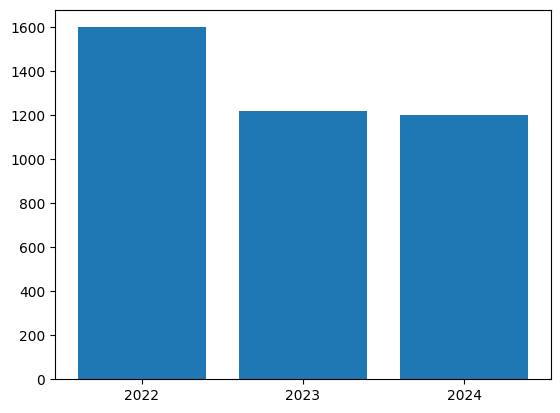

In [ ]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_trips = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_trips['TripYear'], height=df_trips['TripAmount'])

# Display the plot
plt.show()

Review the results, which consist of a column chart with the total trip amount for each year. Note the following features of the code used to produce this chart:

- The **matplotlib** library requires a Pandas dataframe, so you need to convert the Spark dataframe returned by the Spark SQL query to this format.
- At the core of the **matplotlib** library is the **pyplot** object. This is the foundation for most plotting functionality.
- The default settings result in a usable chart, but there’s considerable scope to customize it, as you'll see by running the following cell.

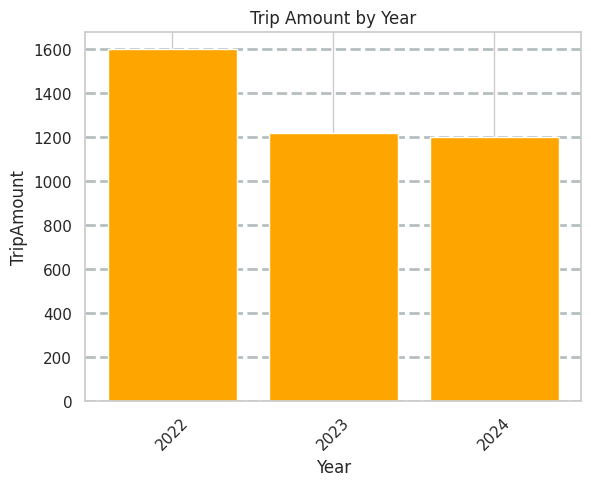

In [ ]:
# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_trips['TripYear'], height=df_trips['TripAmount'], color='orange')

# Customize the chart
plt.title('Trip Amount by Year')
plt.xlabel('Year')
plt.ylabel('TripAmount')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

A plot is technically contained with a **Figure**. In the previous examples, the figure was created implicitly for you; but you can create it explicitly.

<Figure size 640x480 with 0 Axes>

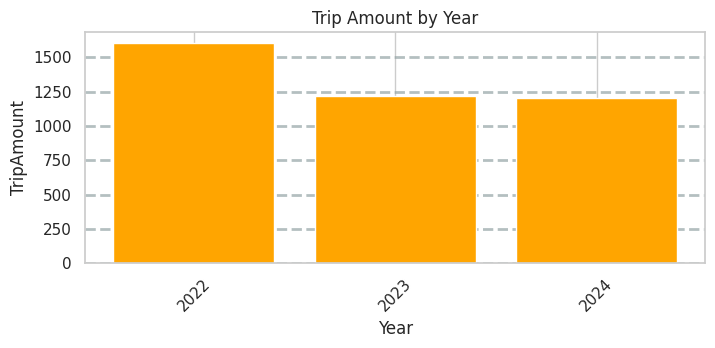

In [ ]:
# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_trips['TripYear'], height=df_trips['TripAmount'], color='orange')

# Customize the chart
plt.title('Trip Amount by Year')
plt.xlabel('Year')
plt.ylabel('TripAmount')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

A figure can contain multiple subplots, each on its own axis.

<Figure size 640x480 with 0 Axes>

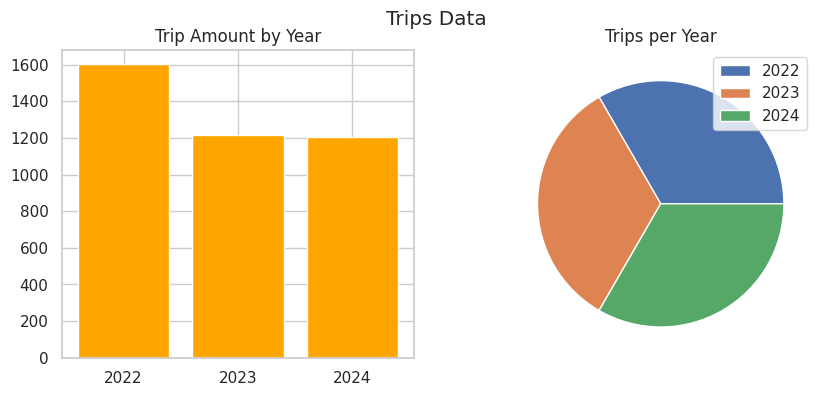

In [ ]:
# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_trips['TripYear'], height=df_trips['TripAmount'], color='orange')
ax[0].set_title('Trip Amount by Year')

# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_trips['TripYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Trips per Year')
ax[1].legend(yearly_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Trips Data')

# Show the figure
plt.show()

### Use the seaborn library

While **matplotlib** enables you to create complex charts of multiple types, it can require some complex code to achieve the best results. For this reason, over the years, many new libraries have been built on the base of matplotlib to abstract its complexity and enhance its capabilities. One such library is **seaborn**.

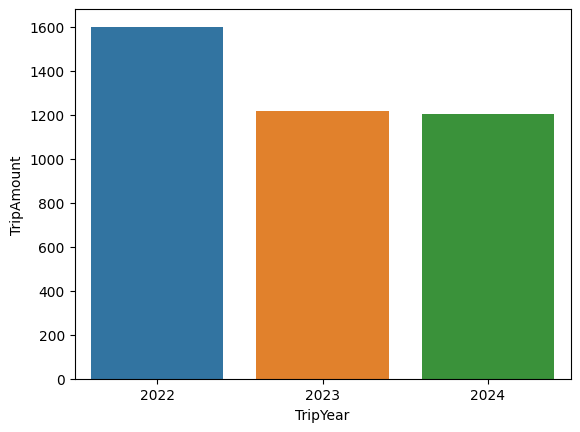

In [ ]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="TripYear", y="TripAmount", data=df_trips)
plt.show()

The **seaborn** library makes it simpler to create complex plots of statistical data, and enables you to control the visual theme for consistent data visualizations.

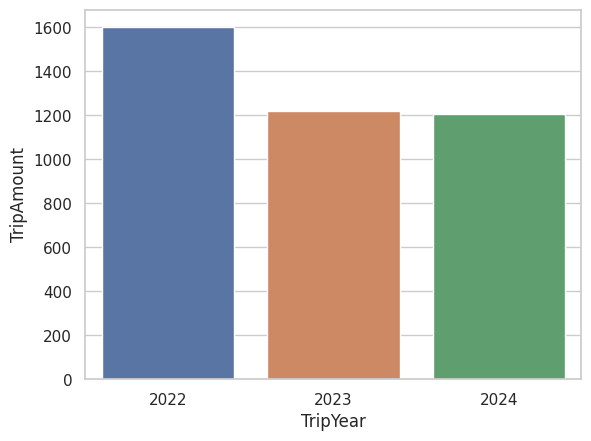

In [ ]:
# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="TripYear", y="TripAmount", data=df_trips)
plt.show()

Both **matplotlib** and **seaborn** support multiple charts types. For example, run the following cell to view the yearly trip amounts totals as a line chart.

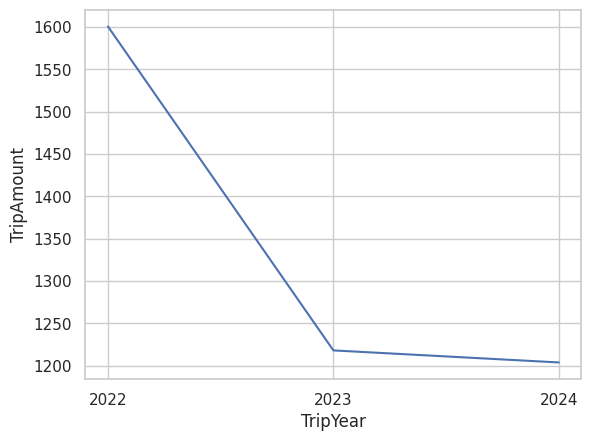

In [ ]:
# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.lineplot(x="TripYear", y="TripAmount", data=df_trips)
plt.show()

In this notebook, you've explored the techniques for using Spark to explore and analyze data. To learn more about working with Dataframes in Azure Databricks using PySpark, see **SQL Serverless and Spark Clusters** section in **Chapter 3, Designing and Implementing the Data Exploration Layer**.